In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import data_loader as data
from model import MNIST

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
batch_size = 128
model_path = 'model/model'

In [4]:
model = MNIST()
saver = tf.train.Saver()    

In [5]:
with tf.Session() as sess:
    saver.restore(sess, model_path)
    images, class_labels, color_labels = data.next_batch(False, batch_size)
    
    class_out, color_out = sess.run([model.class_out, model.color_out], feed_dict={
        model.x: images,
        model.keep_prob: 1.0,
    })
class_out.shape, color_out.shape

INFO:tensorflow:Restoring parameters from model/model


((128,), (128,))

In [6]:
np.sum(class_out == class_labels)

127

In [7]:
np.sum(color_out == color_labels)

128

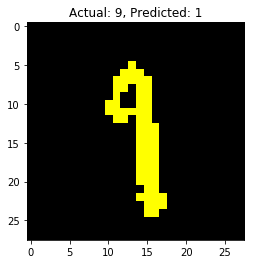

In [8]:
for idx in np.where(class_out != class_labels)[0]:
    plt.imshow(images[idx].astype(np.uint8))
    plt.title(f'Actual: {class_labels[idx]}, Predicted: {class_out[idx]}');